In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy.stats import skew, norm, boxcox_normmax, yeojohnson
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Open files
train = pd.read_csv("./data/BikeSharingDemand/train.csv")
test = pd.read_csv("./data/BikeSharingDemand/test.csv")
test.head(5)

In [ ]:
# Check the missing values

def missing(df):
 data = pd.DataFrame(df)
 df_cols = list(pd.DataFrame(data))

 dict_x = {}
 for i in range(0, len(df_cols)):
  dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100, 2)})
 
 return dict_x

# ~It doesn't have missing values



In [ ]:
scaler = MinMaxScaler()
count_scaled = scaler.fit_transform(train['count'].values.reshape(1, -1))
count_scaled = pd.DataFrame(count_scaled)

In [ ]:
numeric_dtypes = ["int16", "float16", "int32", "float32", "int64", "float64"]
numerics = []
pt = PowerTransformer(method='yeo-johnson')

for i in train.columns:
 if train[i].dtype in numeric_dtypes:
  numerics.append(i)

high_skew = []
low_skew = []

for i in numerics:
  if skew(train[i]) > 0.5 and skew(train[i]) > 0:
    high_skew.append(i)
  elif skew(train[i]) < 0:
    low_skew.append(i)

print(high_skew)
print(low_skew)

all_skews = high_skew + low_skew

for i in all_skews:
  train[i] = pt.fit_transform(train[i].values.reshape(-1,1))

skew_features = train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

all_skews

In [6]:
# Check the correlation of the data

from scipy.stats import pearsonr

corr, _ = pearsonr(train['count'], train['workingday'])

all_corrs = []

for i in train.columns:
 if i == "datetime":
  continue
 corr, _ = pearsonr(train['count'], train[i])
 all_corrs.append([corr,i])

# Drop "Registered" column as it doesn't hold much of a valuable information

train = train.drop(["registered", "casual"], axis=1)
train.columns

# Get all the datetime values before removing them from the testing data
test_datetime = test['datetime']

In [7]:
# Split the data into the dedicated columns (month - day - year) and maybe correlate them somehow?

def dt(df):
 df['datetime'] = pd.to_datetime(df['datetime'])
 df['year'] = df['datetime'].dt.year
 df['month'] = df['datetime'].dt.month
 df['day'] = df['datetime'].dt.day
 df['hour'] = df['datetime'].dt.hour
 df['daytime'] = df['hour'].apply(lambda x: 1 if x > 6 and x < 21 else 0)
 df['dayofweek'] = df['datetime'].dt.day_of_week
 df = df.drop(["datetime"], axis = 1)

 return df



In [8]:
train = dt(train)
test = dt(test)

train.head(55)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,daytime,dayofweek
0,-1.39244,-0.17149,-1.460672,-0.714718,9.84,-1.092229,0.993161,-1.883830,-1.264996,2011,1,1,0,0,5
1,-1.39244,-0.17149,-1.460672,-0.714718,9.02,-1.182815,0.941223,-1.883830,-0.809686,2011,1,1,1,0,5
2,-1.39244,-0.17149,-1.460672,-0.714718,9.02,-1.182815,0.941223,-1.883830,-0.933525,2011,1,1,2,0,5
3,-1.39244,-0.17149,-1.460672,-0.714718,9.84,-1.092229,0.681516,-1.883830,-1.350020,2011,1,1,3,0,5
4,-1.39244,-0.17149,-1.460672,-0.714718,9.84,-1.092229,0.681516,-1.883830,-1.974239,2011,1,1,4,0,5
5,-1.39244,-0.17149,-1.460672,1.321634,9.84,-1.272913,0.681516,-0.761802,-1.974239,2011,1,1,5,0,5
6,-1.39244,-0.17149,-1.460672,-0.714718,9.02,-1.182815,0.941223,-1.883830,-1.872778,2011,1,1,6,0,5
7,-1.39244,-0.17149,-1.460672,-0.714718,8.20,-1.272913,1.252839,-1.883830,-1.792807,2011,1,1,7,1,5
8,-1.39244,-0.17149,-1.460672,-0.714718,9.84,-1.092229,0.681516,-1.883830,-1.525764,2011,1,1,8,1,5
9,-1.39244,-0.17149,-1.460672,-0.714718,13.12,-0.732075,0.733460,-1.883830,-1.320381,2011,1,1,9,1,5


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


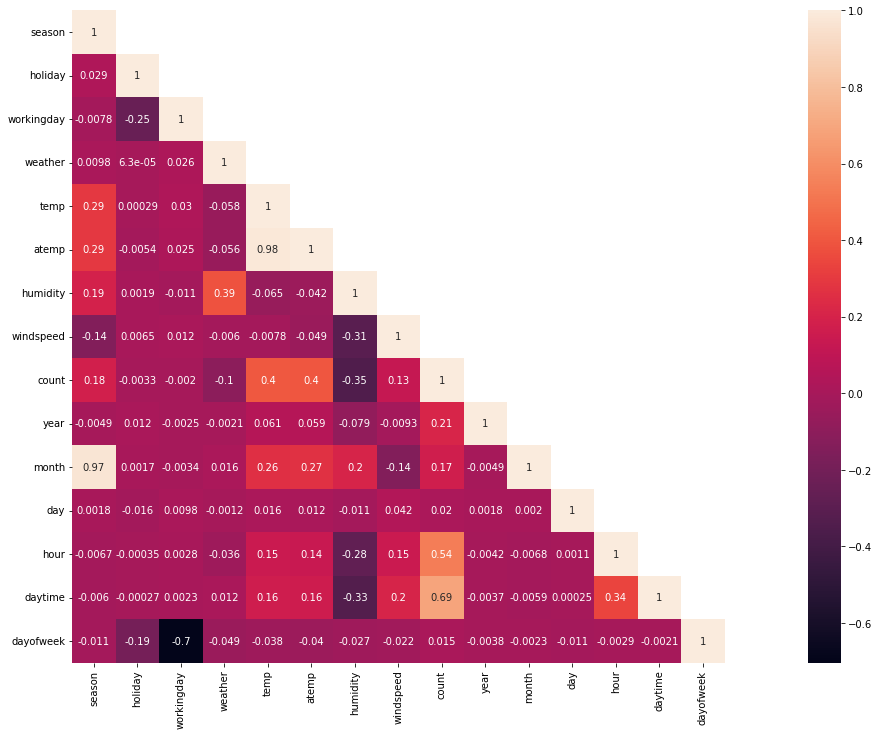

In [9]:
cor_mat = train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

print(mask[np.tril_indices_from(mask)])

In [10]:
# Let's split the data and train the model

from xgboost import XGBClassifier

Y = train['count']
X = train.drop("count", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(X_train.dtypes)
print(y_train.dtypes)

model = XGBClassifier()
model.fit(X, Y)

c:\Users\Administrator\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Administrator\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Administrator\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64In

season        float64
holiday       float64
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
year            int64
month           int64
day             int64
hour            int64
daytime         int64
dayofweek       int64
dtype: object
float64
[23:26:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
from sklearn.metrics import mean_squared_error


pred = model.predict(test)




In [12]:
prediction = pd.DataFrame()
prediction['datetime'] = test_datetime
prediction['count'] = pred

prediction.head(15)

,datetime,count
0,2011-01-20 00:00:00,-0.950428
1,2011-01-20 01:00:00,-1.667514
2,2011-01-20 02:00:00,-1.792807
3,2011-01-20 03:00:00,-1.792807
4,2011-01-20 04:00:00,-1.792807
5,2011-01-20 05:00:00,-1.792807
6,2011-01-20 06:00:00,-0.095365
7,2011-01-20 07:00:00,1.330841
8,2011-01-20 08:00:00,0.381441
9,2011-01-20 09:00:00,1.330841


In [13]:
prediction.to_csv("submission.csv", encoding='utf-8', index=False)